# 선형모델(Linear Models)

- 선형 모델은 과거부터 지금까지 널리 사용되고 연구되고 있는 기계학습 방법
- 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
- 회귀 분석을 위한 선형 모델은 다음과 같이 정의
- y^(w,x)= w0+w1x1+...+wpxp
- x: 입력 데이터
- y: 모델이 학습할 파라미터
- w0: 편향
- w1~wp: 가중치

# 선형 회귀(linear Regression)
- 선형회귀 또는 최소제곱법은 가장 간단한 회귀 분석을 위한 선형 모델
- 선형 회귀는 모델의 예측과 정답 사이의 평균 제곱오차를 최소화하는 학습 파라미터 w를 찾음.
- 평균제곱오차는 아래와 같이 정의
- MSE = 1/N 시그마(yi-y^i)^2
- y: 정답
- y^: 예측 값을 의미

- 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
    - MAE
    - MAPE
    - MSE
    - MPE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

C:\Users\seoyj\AppData\Local\Temp\ipykernel_7964\122571495.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

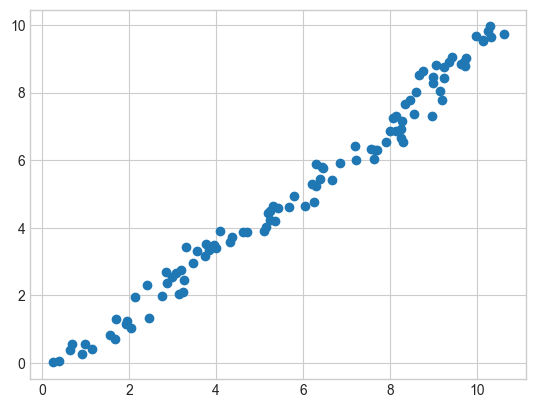

In [17]:
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100,1)) + noise # 정렬 sorted
y = sorted(10 * np.random.rand(100))
plt.scatter(X,y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print("선형 회귀 가중치: {}".format(model.coef_))
print("선형 회귀 편향: {}".format(model.intercept_))

선형 회귀 가중치: [0.95330673]
선형 회귀 편향: -0.49416431216193146


In [24]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.9805398443267667
평가 데이터 점수:0.986674803924682


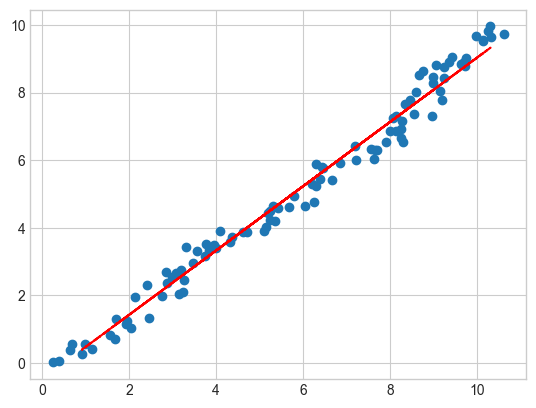

In [25]:
predict = model.predict(X_test)
plt.scatter(X,y)
plt.plot(X_test, predict, '--r')

## 보스턴 주택 가격 데이터
- 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 분석 등 많은 활용 가능
- 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
- 해리슨과 루빈펠트의 논문에서 보스턴 데이터가 사용
- 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

    - CRIM : 자치시(town)별 1인당 범죄율
    - ZN : 25,000평방 피트가 넘는 거주지역 토지비율
    - INDUS : 자치시(town)별 비소매 상업지역 토지 비율
    - CHAS:  찰스 강(Charles River)에 대한 변수(강의 경계에 위치하면 1, 아니면 0)
    - NOW : 10,000,000 당 일산화질소 농도
    - RM : 주택 1가구당 평균 방의 수
    - AGE : 1940년 이전에 건축된 소유주택 비율
    - DIS: 5개의 보스턴 고용 센터까지의 가중 거리
    - RAD : 방사형 고속도로 접근성 지수
    - TAX : 10,000 달러당 재산 세율
    - PTRATIO : 자치시별 학생/교사 비율
    - B : 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율
    - LSTAT: 모집단의 하위계층 비율(%)
    - MEDV : 소유자가 거주하는 주택가격(중앙값)(단위:1,000달러)

In [29]:
from sklearn.datasets import load_boston

boston = load_boston()
# print(boston.keys())
# print(boston.DESCR)
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head(5)


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [30]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

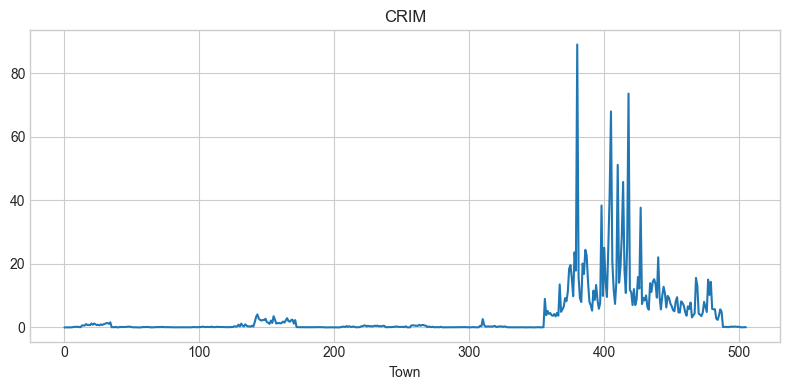

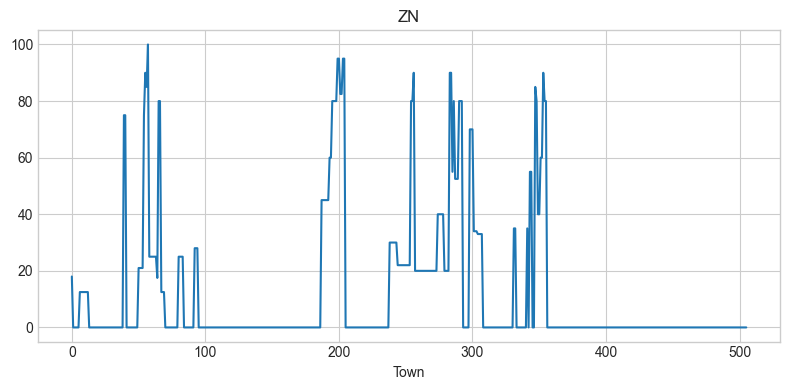

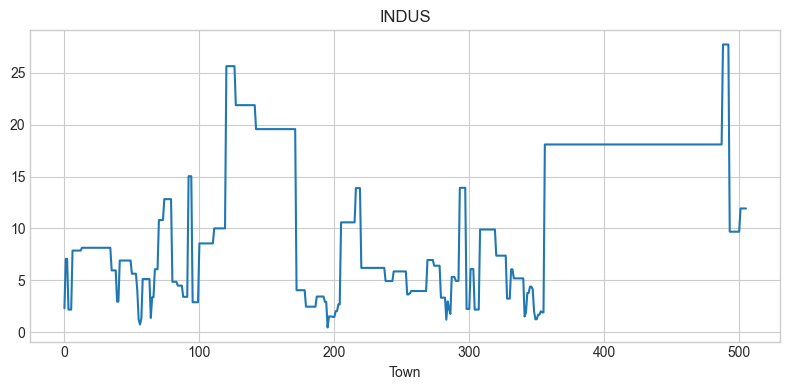

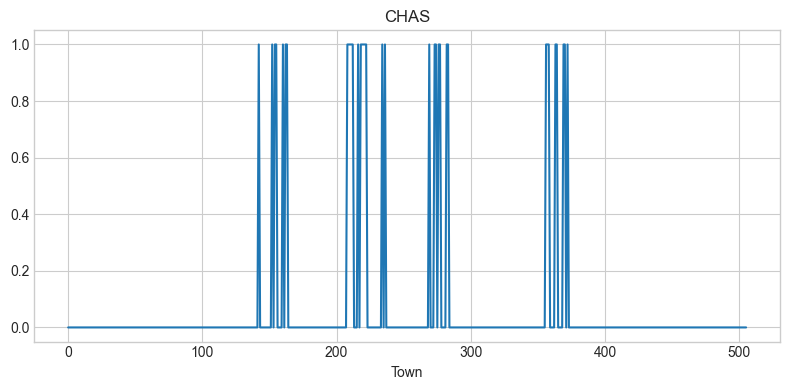

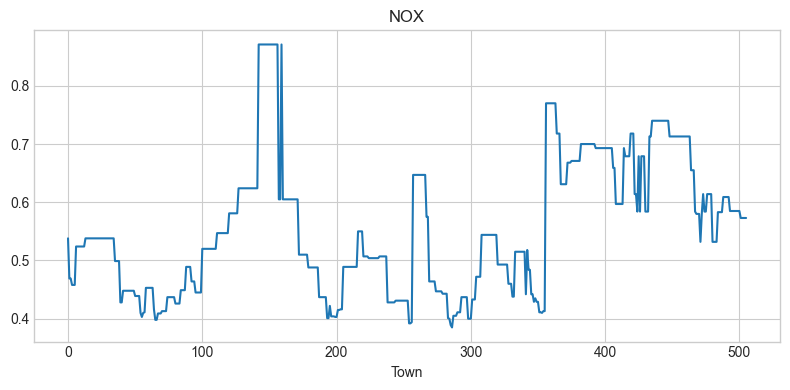

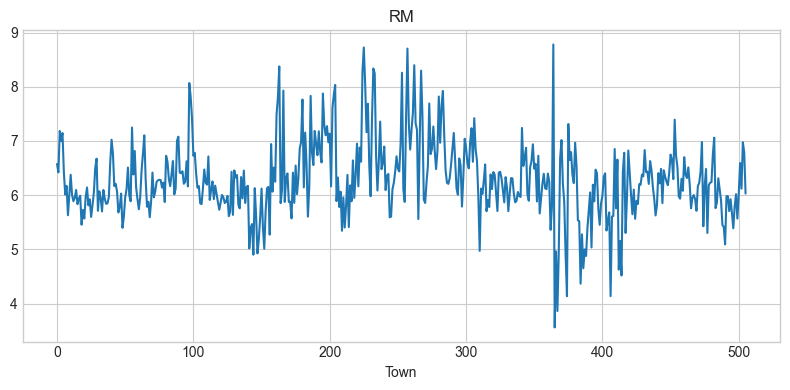

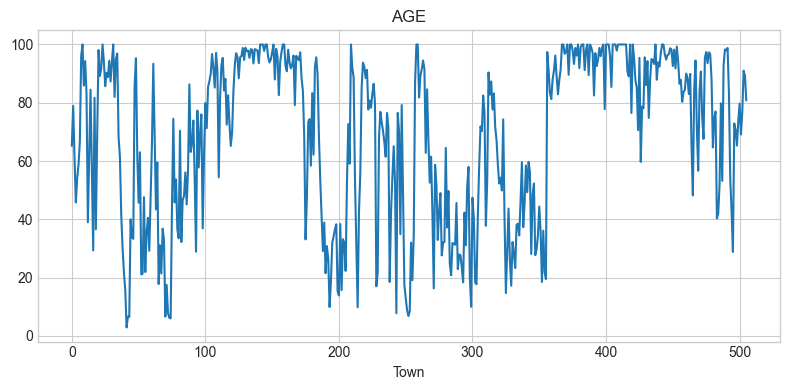

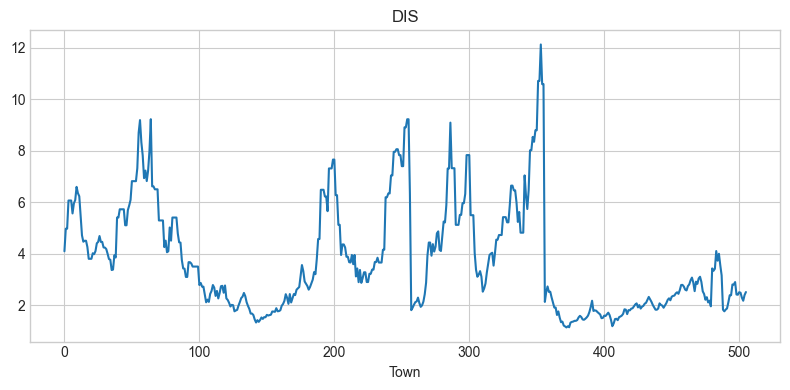

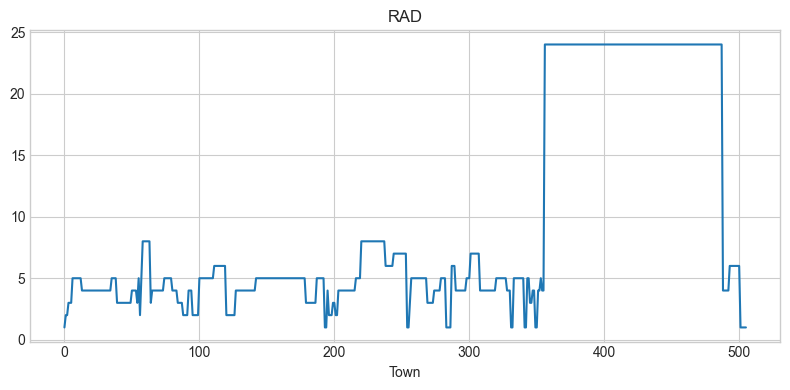

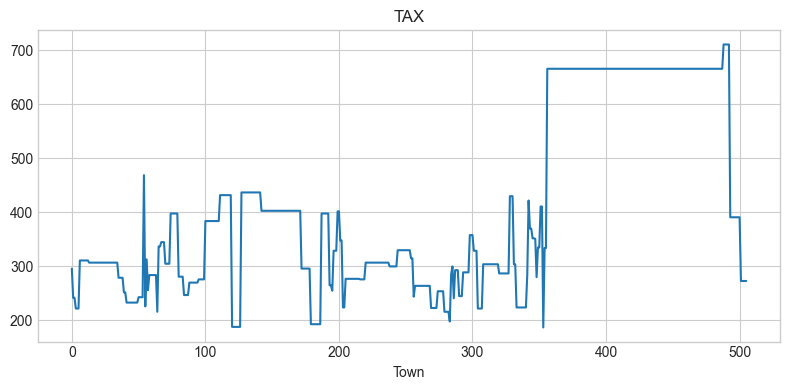

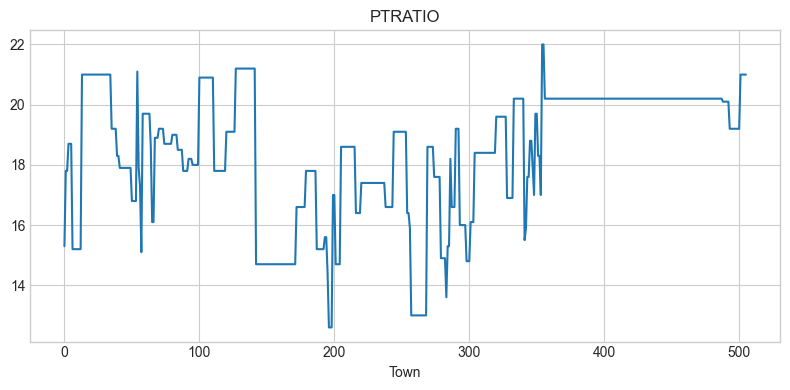

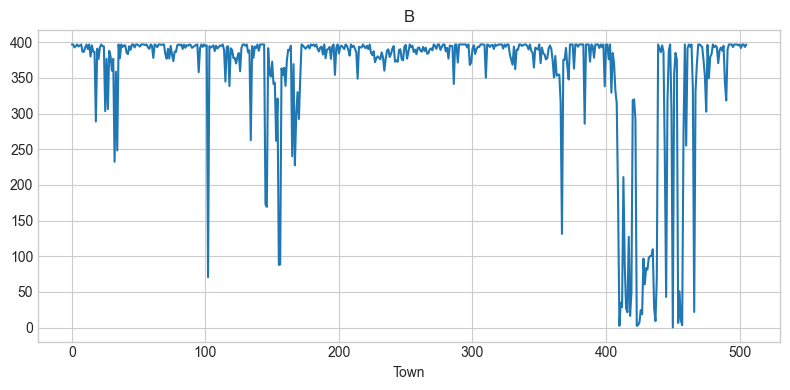

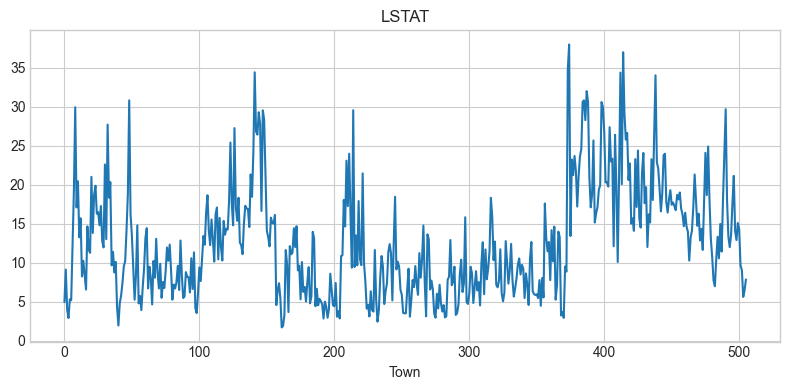

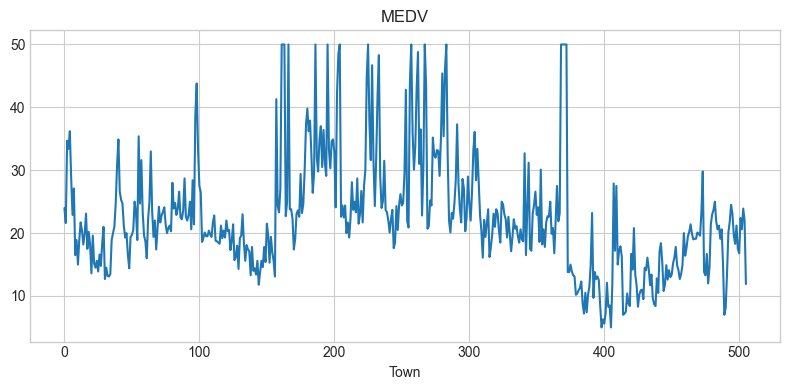

In [31]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout()
    plt.show()

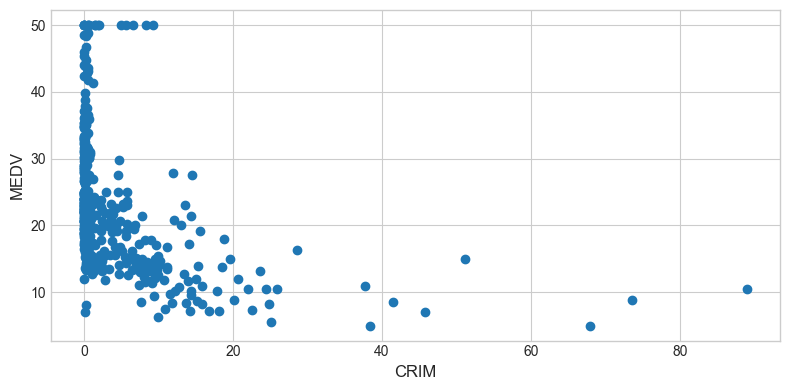

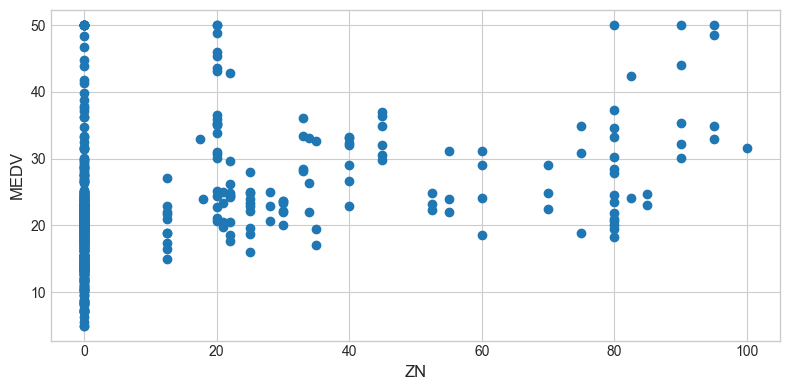

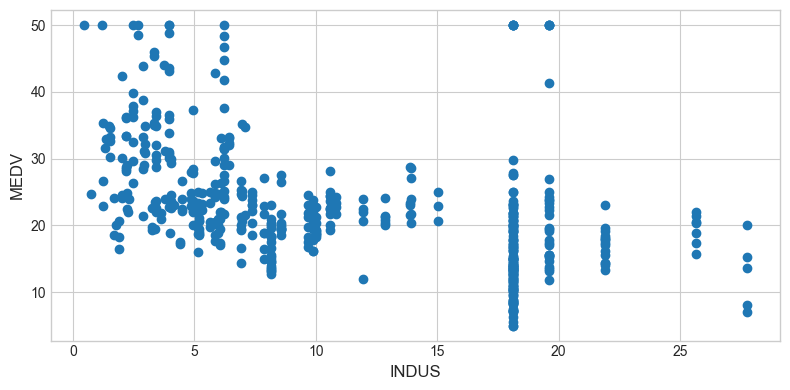

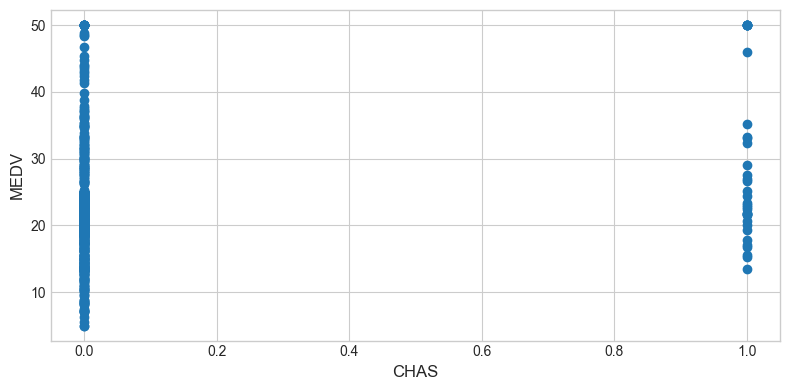

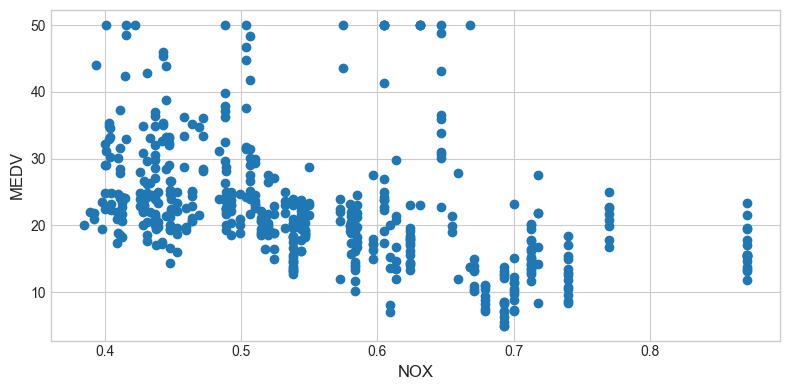

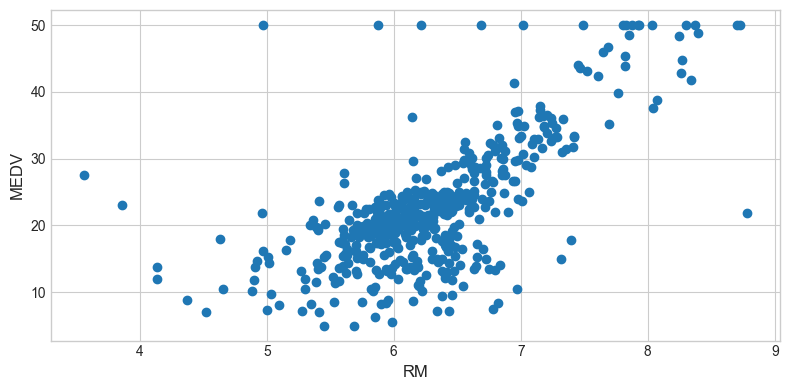

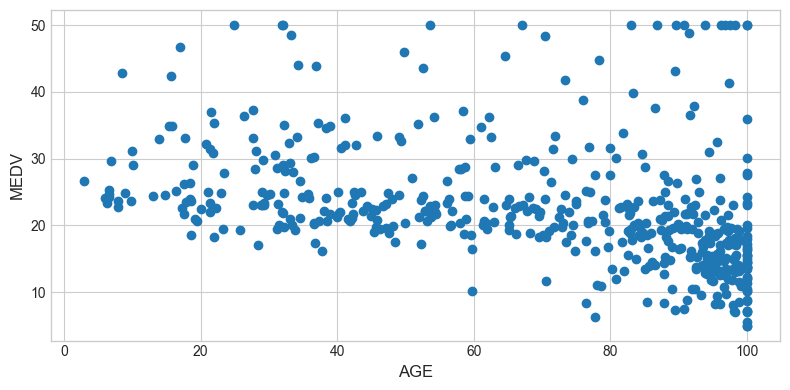

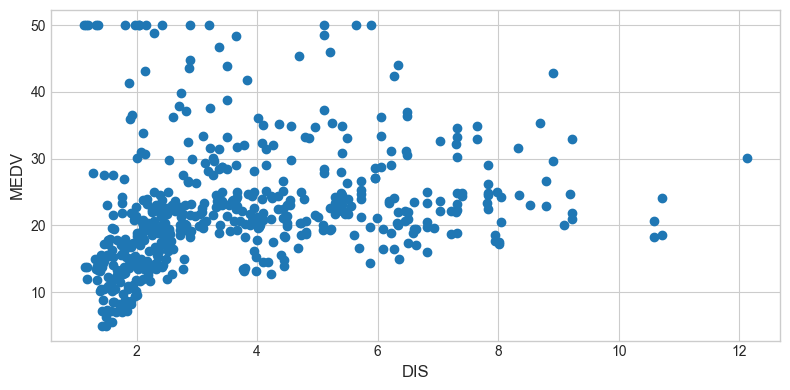

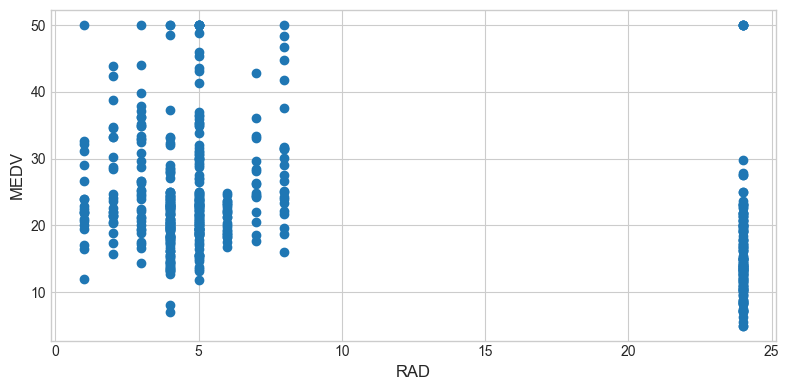

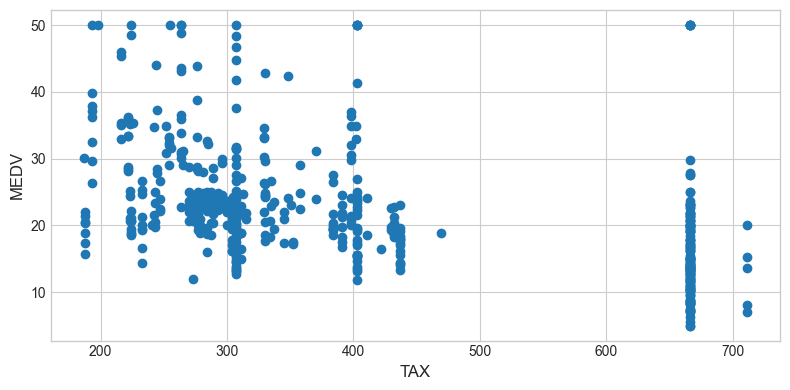

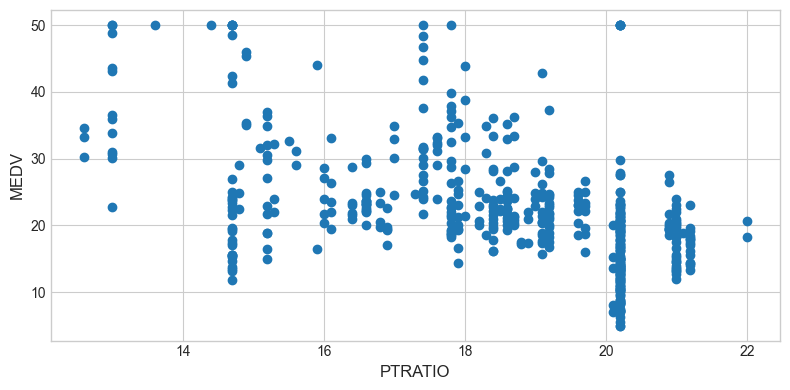

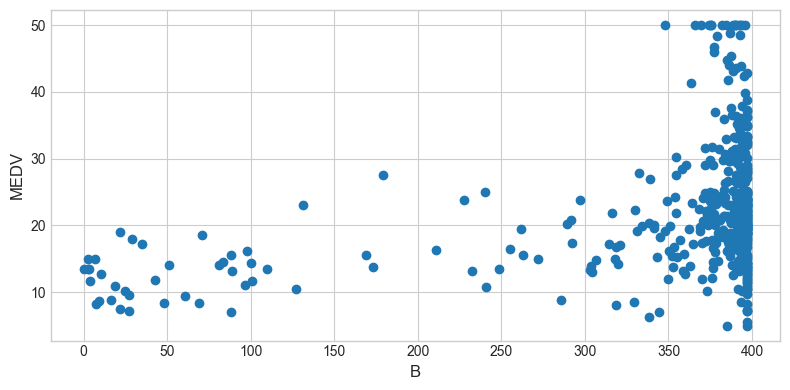

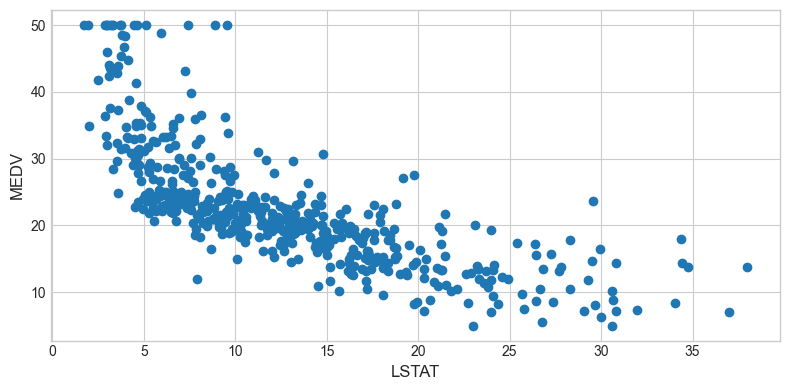

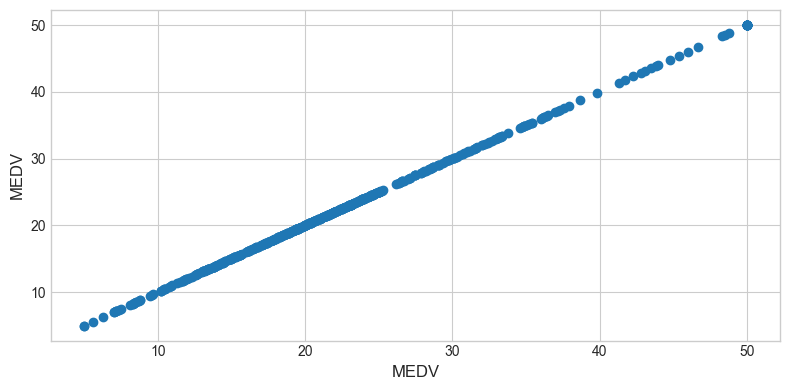

In [35]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col],boston_df['MEDV'])
    plt.xlabel(col, size=12)
    plt.ylabel('MEDV', size=12)
    plt.tight_layout()
    plt.show()

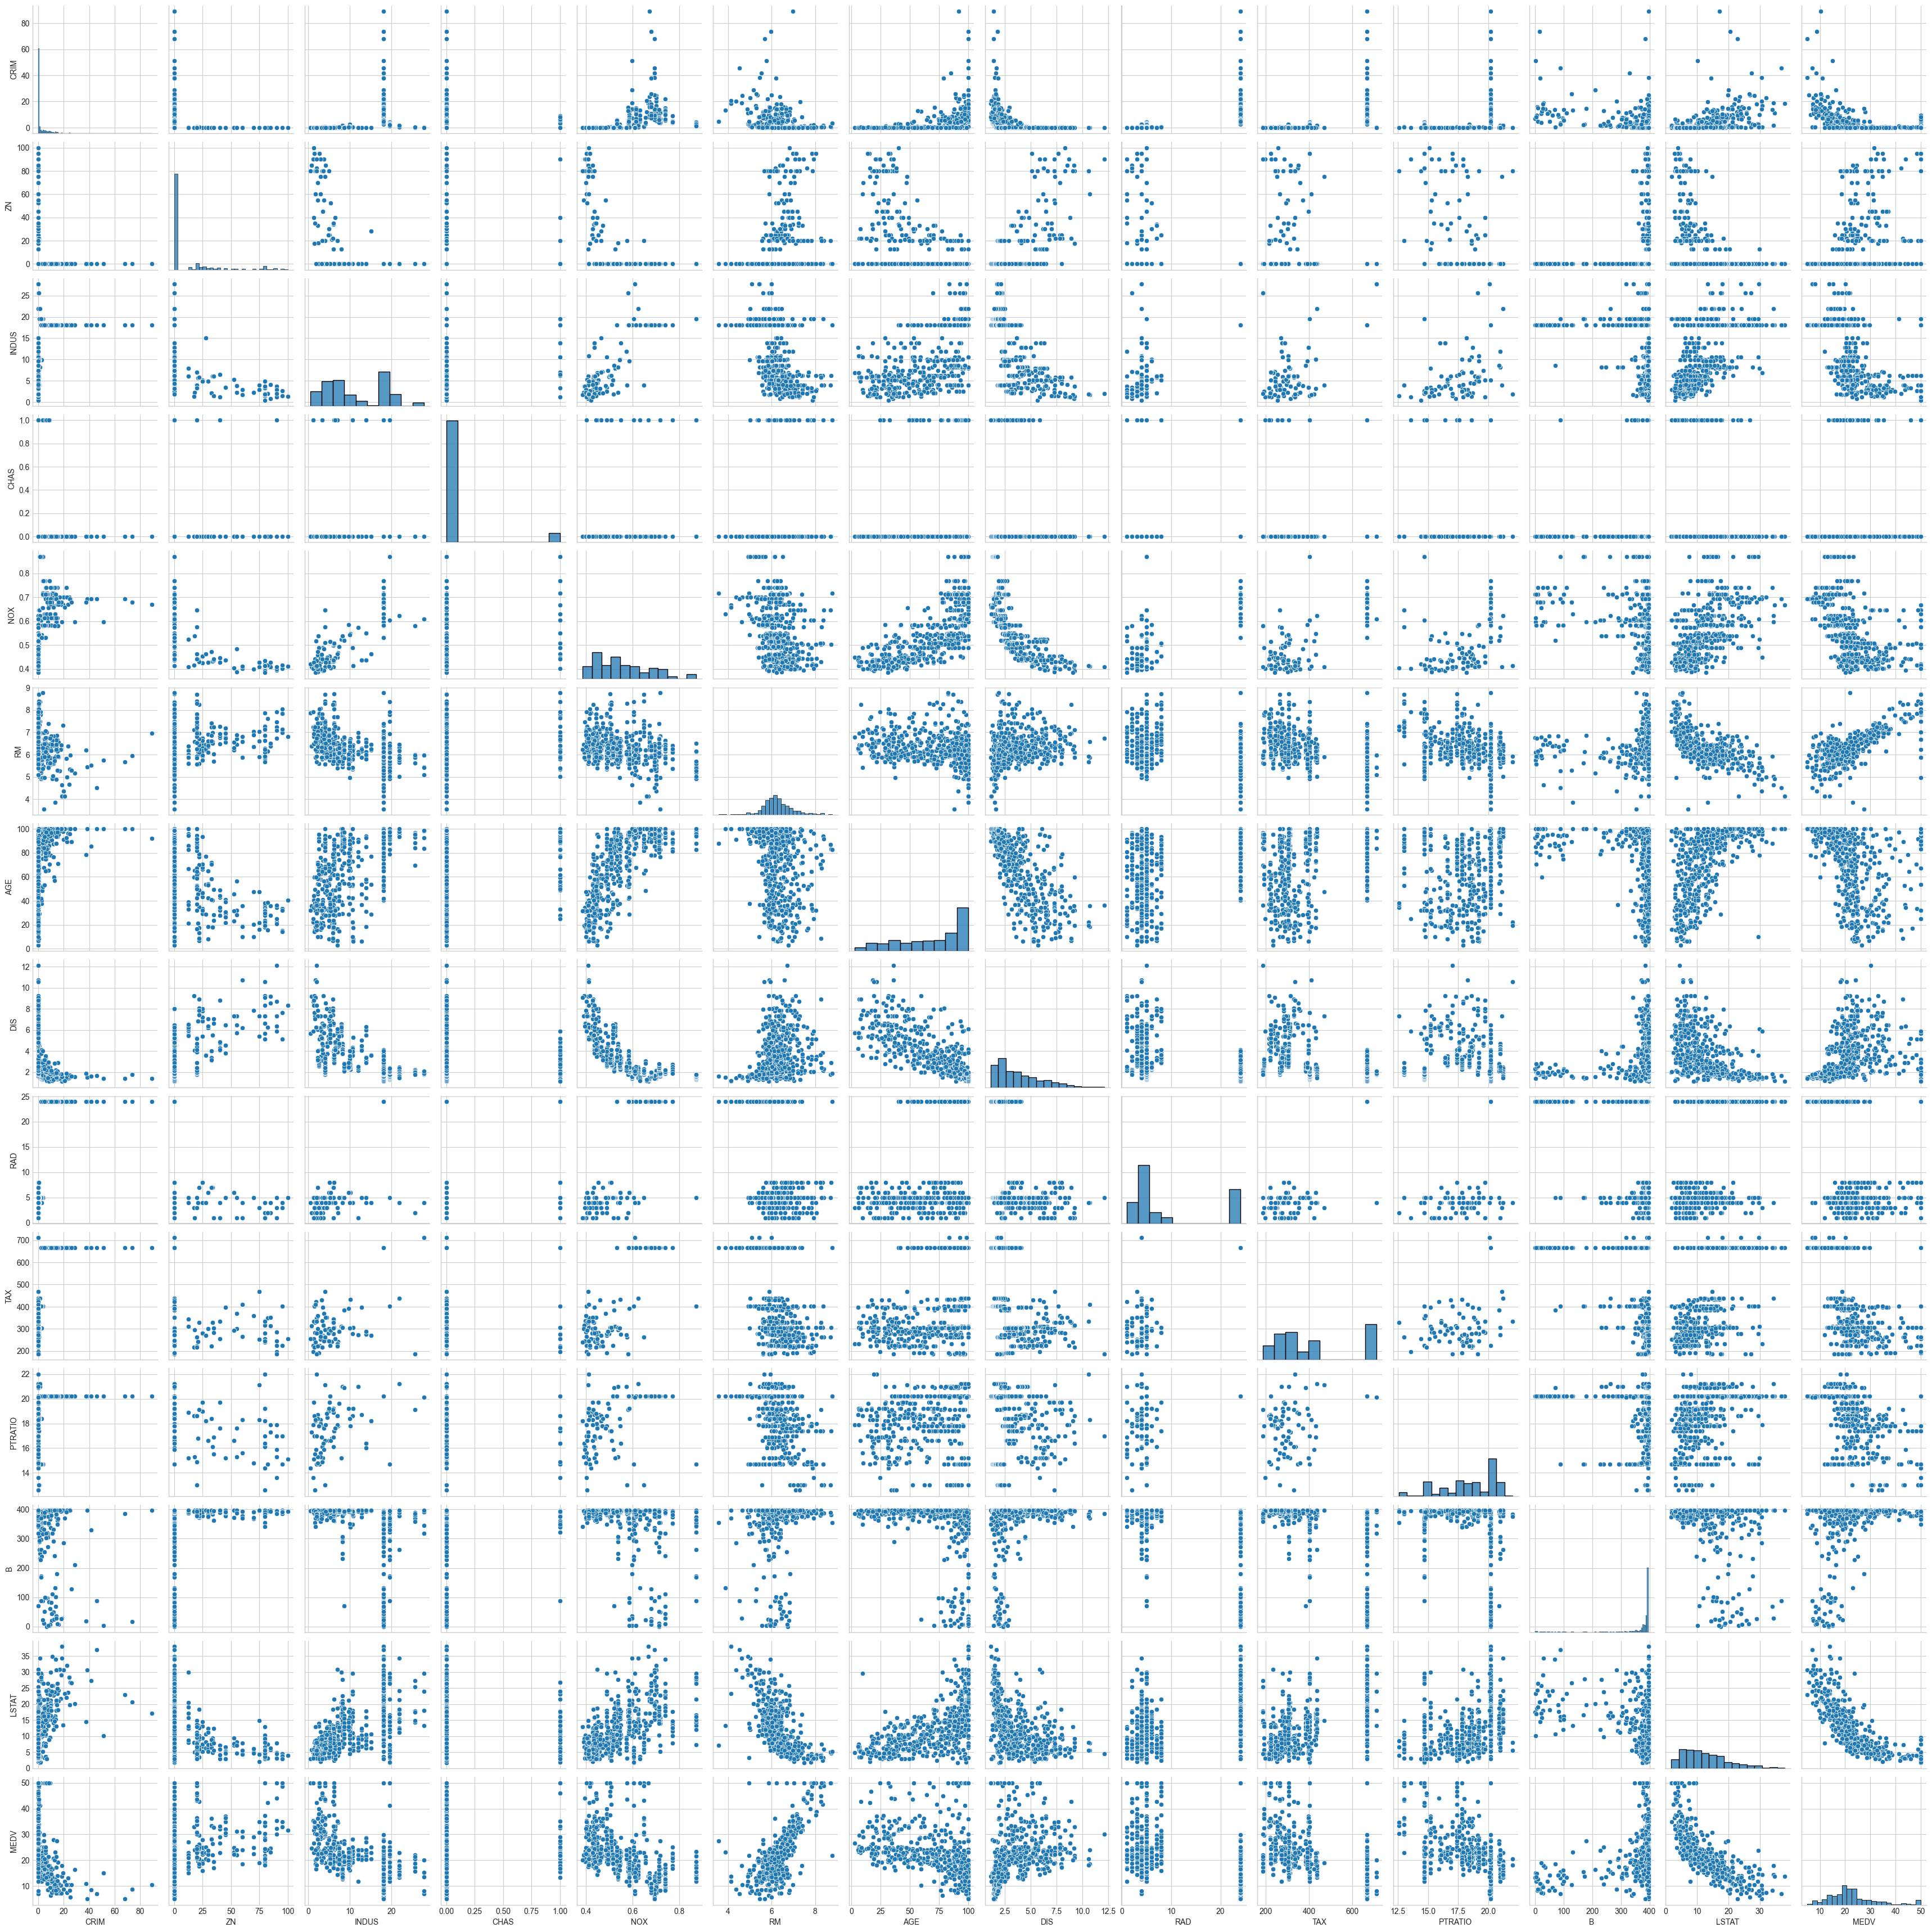

In [38]:
import seaborn as sns
sns.pairplot(boston_df)

## 보스턴 주택 가격에 대한 선형 회귀

In [40]:
from statistics import linear_regression
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

In [42]:
from sklearn.model_selection import train_test_split # 데이터 분리

X_train, X_test, y_train, y_test =train_test_split(boston.data, boston.target, test_size = 0.2) # (x,y) 값 80% train, 20% test 데이터 
model.fit(X_train, y_train)
model.score(X_test, y_test)


c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.7103080414330445

In [43]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7454795724607491
평가 데이터 점수:0.7103080414330445


- 데이터를 두 개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고 분리가 잘 안 된 경우에는 잘못된 검증이 될 수 있음.
- 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
- cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증
- 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston.data, boston.target, cv = 10, scoring='neg_mean_squared_error')
print("NMSE scores : {}".format(scores))
print("NMSE scores mean: {}".format(scores.mean()))
print("NMSE scores std: {}".format(scores.std()))

NMSE scores : [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean: -34.705255944524865
NMSE scores std: 45.57399920030877


c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

- 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, R^2) 사용

In [47]:
r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')
print("R2 scores:{}".format(r2_scores))
print("R2 scores mean:{}".format(r2_scores.mean()))
print("R2 scores std:{}".format(r2_scores.std()))

R2 scores:[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean:0.2025289900605641
R2 scores std:0.5952960169512248


c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

## 생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
    - intercept_: 추정된 상수항
    - coef_: 추정된 가중치 벡터

In [48]:
print('y= ' +str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y= 33.08735143968927 
-0.10027394652578564 * x0
0.045965120916126936 * x1
-0.01483519662593218 * x2
2.5530245189689826 * x3
-14.268183458936582 * x4
3.838404813182956 * x5
0.002737027572614239 * x6
-1.4333571153821218 * x7
0.28875839761532773 * x8
-0.010453429504417246 * x9
-0.9176290443152862 * x10
0.011325333092607245 * x11
-0.5708386328137416 * x12


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict)) # squr = root, 예측한 값과 y_train과의 오차 -> MSE 에 root = RMSE
r2 = r2_score(y_train, y_train_predict)

print("RMSE = {}".format(rmse))
print("R2 Score: {}".format(r2))

RMSE = 4.676266543206387
R2 Score: 0.7454795724607491


In [53]:
y_test_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict)) # squr = root, 예측한 값과 y_train과의 오차 -> MSE 에 root = RMSE
r2 = r2_score(y_test, y_test_predict)

print("RMSE = {}".format(rmse))
print("R2 Score: {}".format(r2))

RMSE = 4.764268437373322
R2 Score: 0.7103080414330445


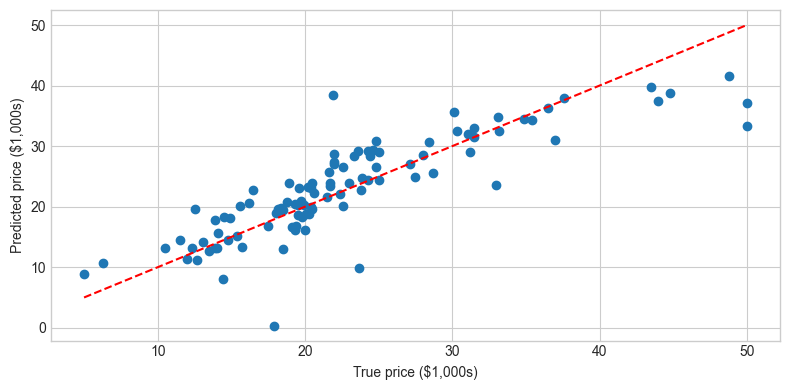

In [55]:
def plot_boston_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5,50],[5,50],'--r')
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()
    plt.show()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)
# 빨간선에 근접할 수록 예측치에 실제값이 가깝다.

# 캘리포니아 주택 가격 데이터
 - MedInc : 블록의 중간 소득
 - HouseAge : 블록의 중간 주택 연도
 - AveRooms : 평균 방 수
 - AveBedrms: 평균 침실 수
 - Population : 블록 내 거주중인 인구수
 - AveOccup : 평균 주택 점유율
 - Latitude : 주택 블록 위도
 - Longitude : 주택 블록 경도

In [58]:
from sklearn.datasets import fetch_california_housing # 데이터 크기가 커서 fetch로 불러와야함

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)



dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [59]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [60]:
california_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

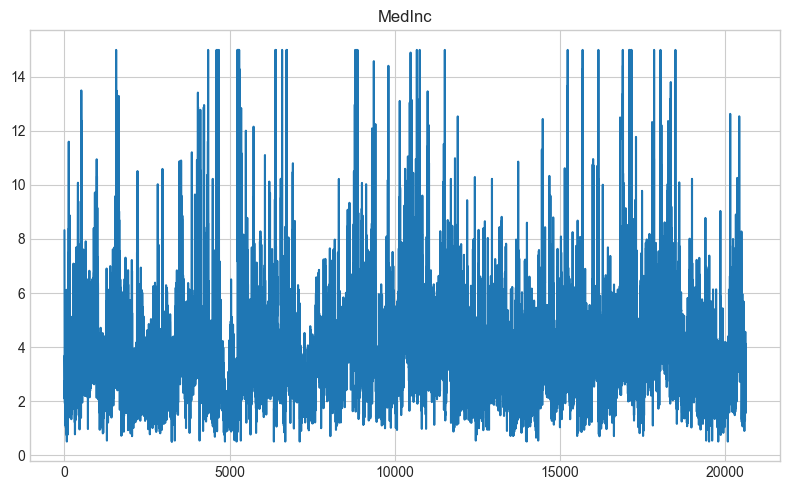

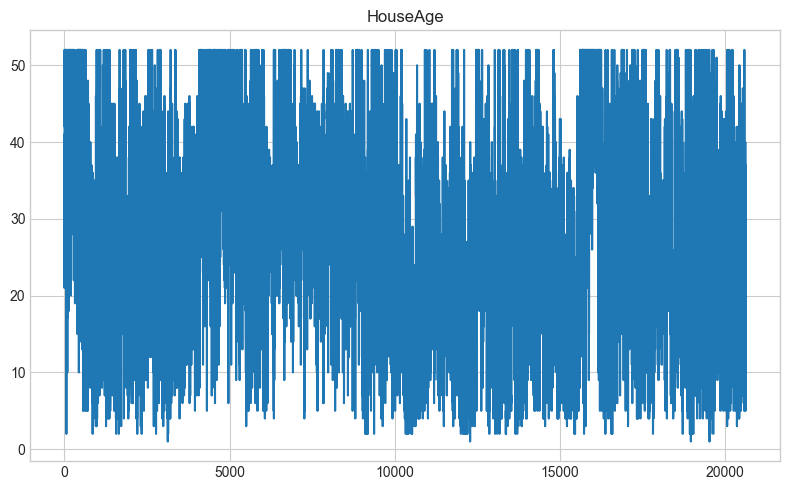

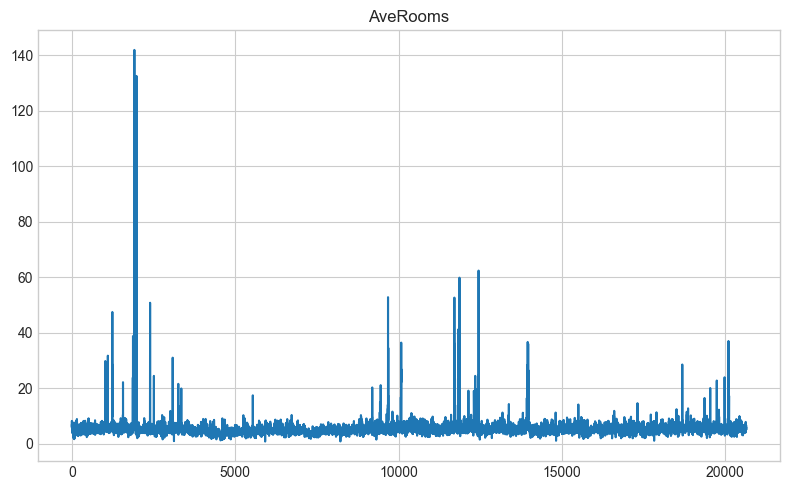

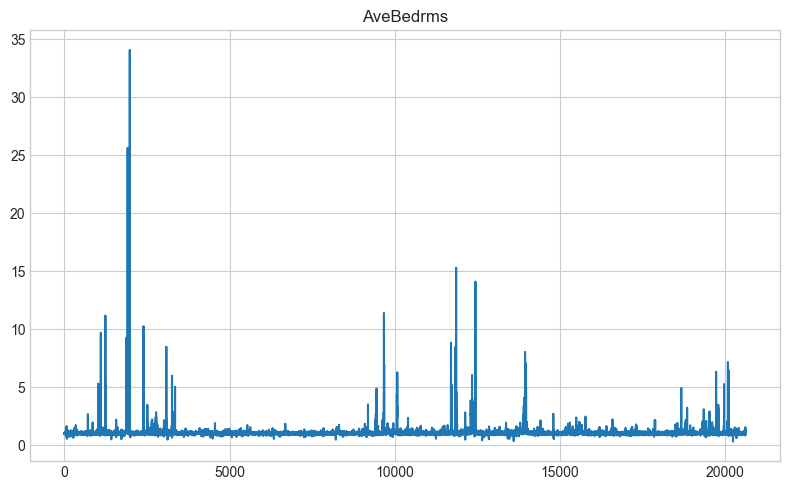

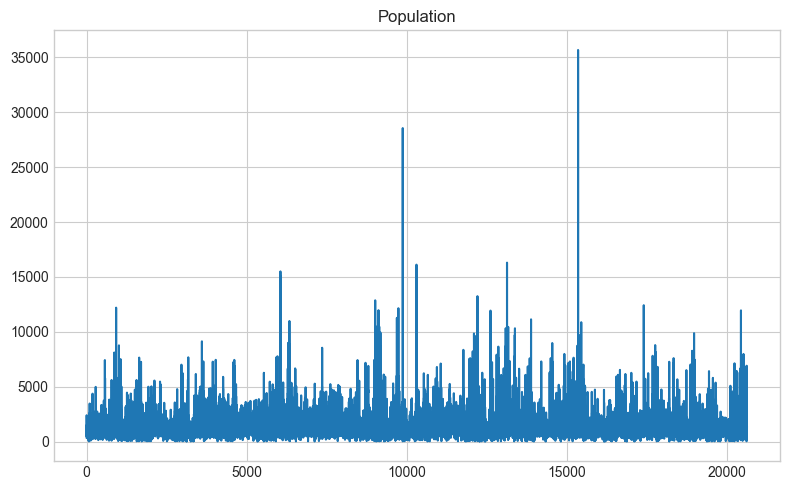

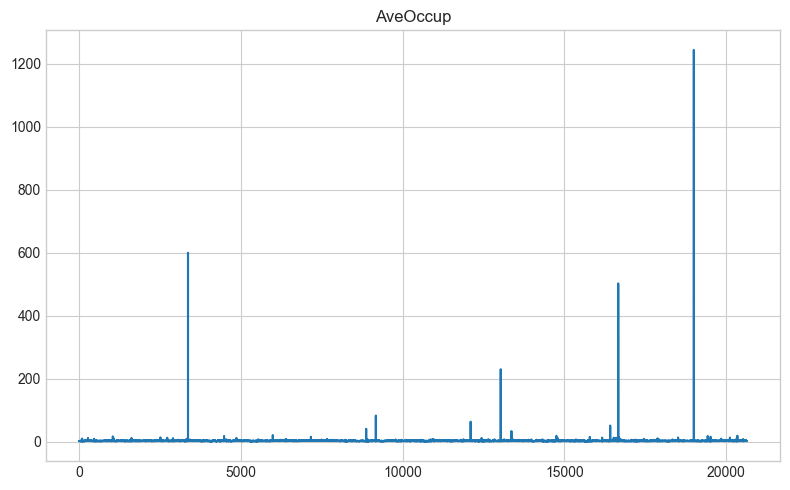

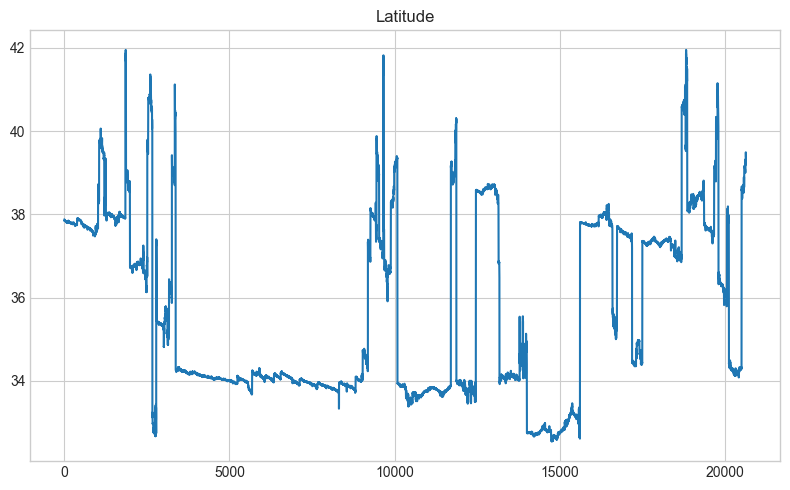

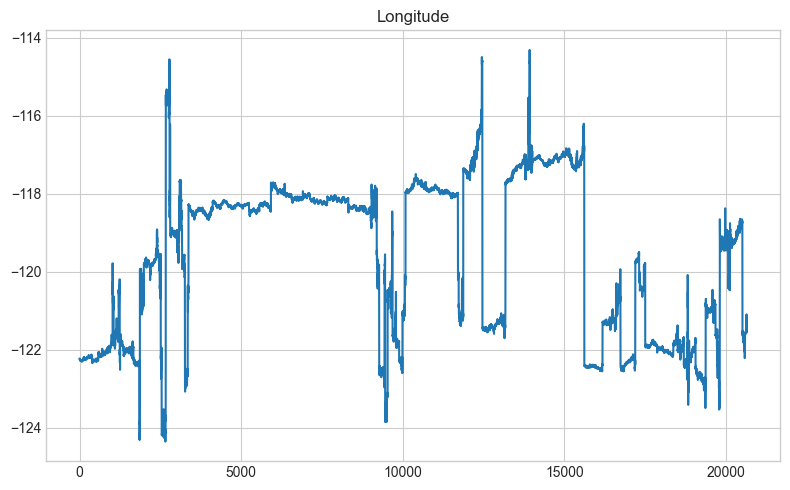

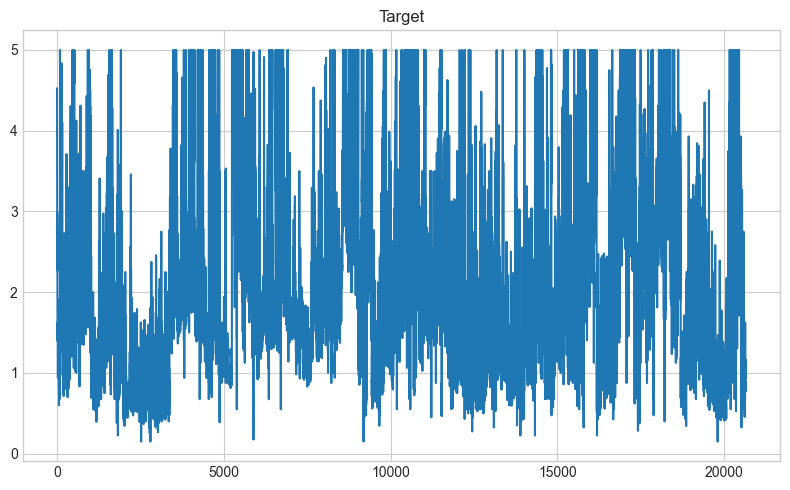

In [63]:
import matplotlib.pyplot as plt

for i,col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.plot(california_df[col])
    plt.title(col)
    plt.tight_layout()

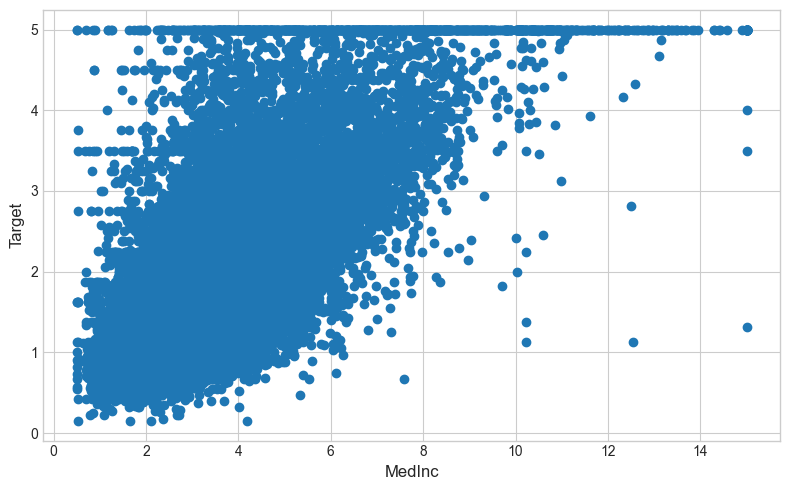

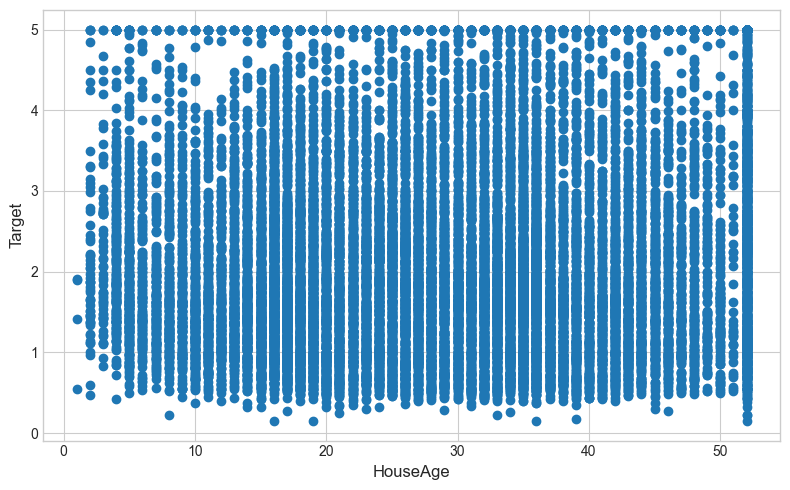

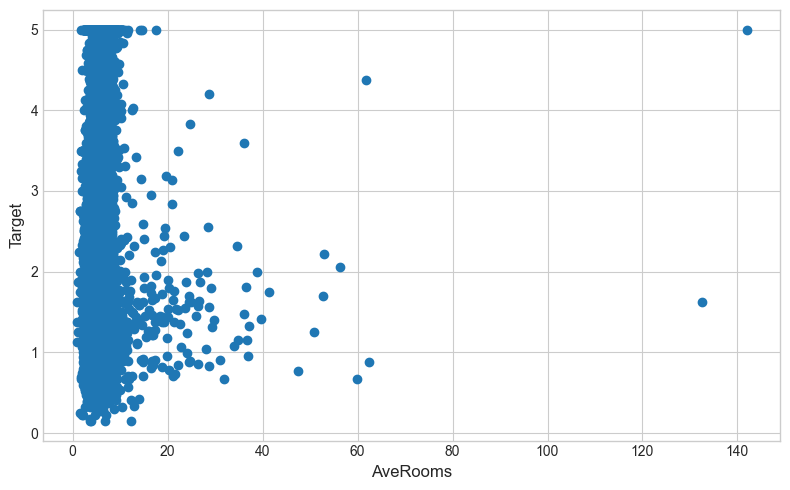

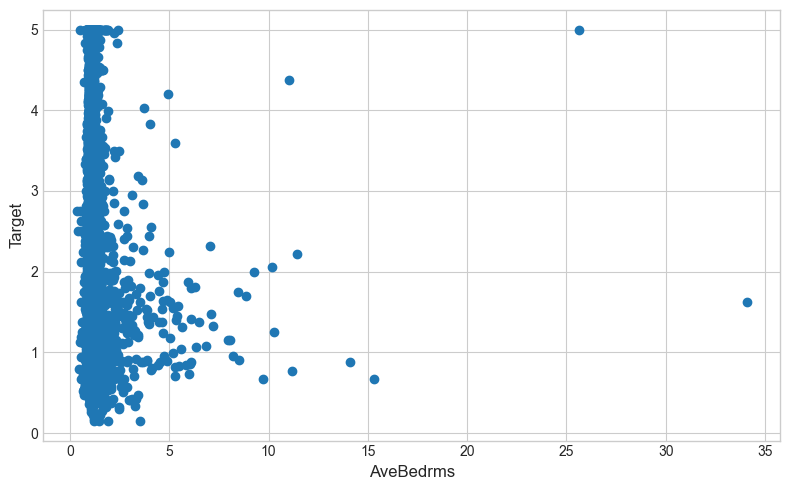

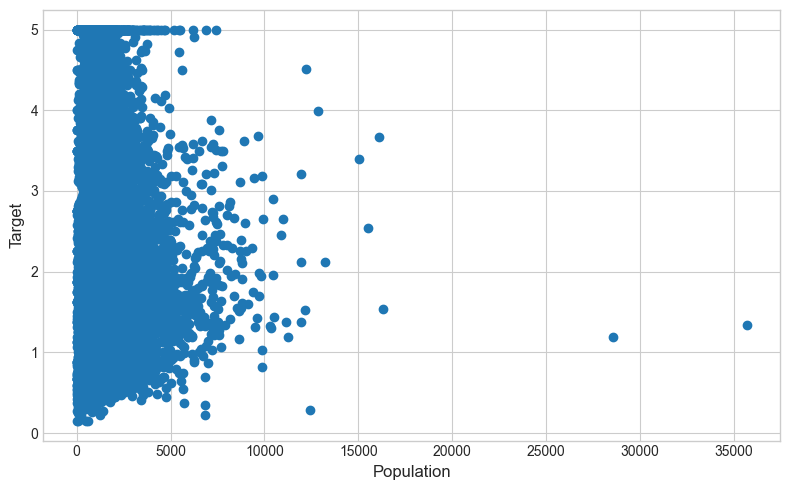

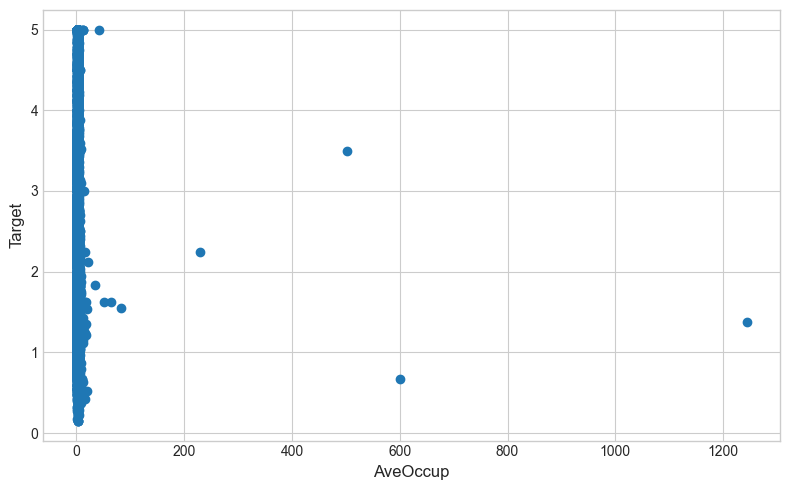

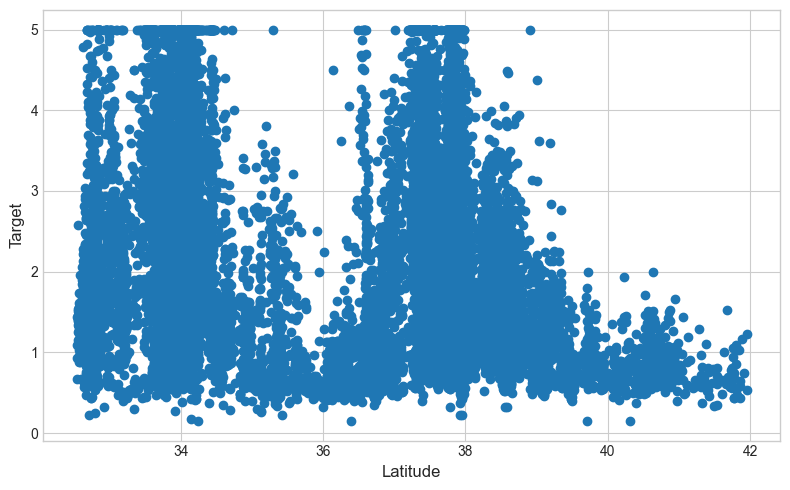

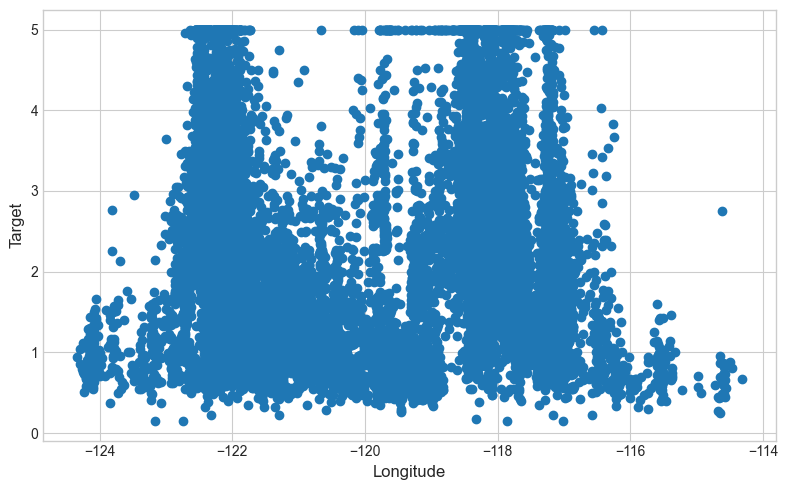

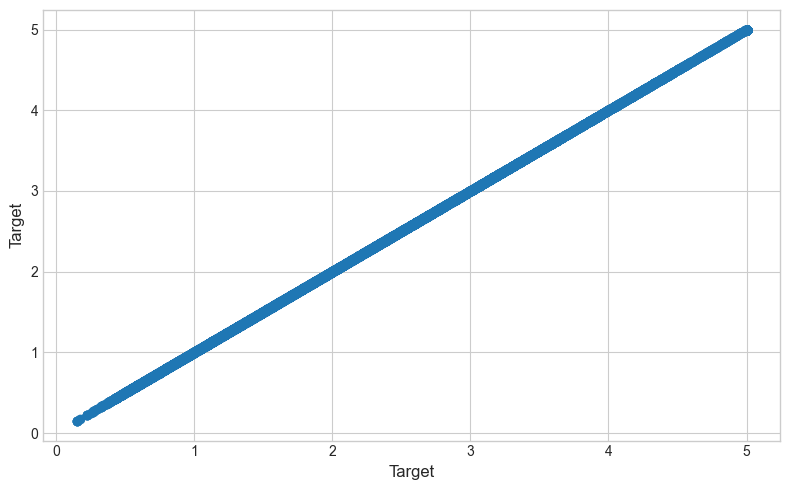

In [65]:
import matplotlib.pyplot as plt

for i,col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.scatter(california_df[col],california_df['Target'])
    plt.ylabel('Target', size=12) #주택의 가격
    plt.xlabel(col, size=12)
    plt.tight_layout()

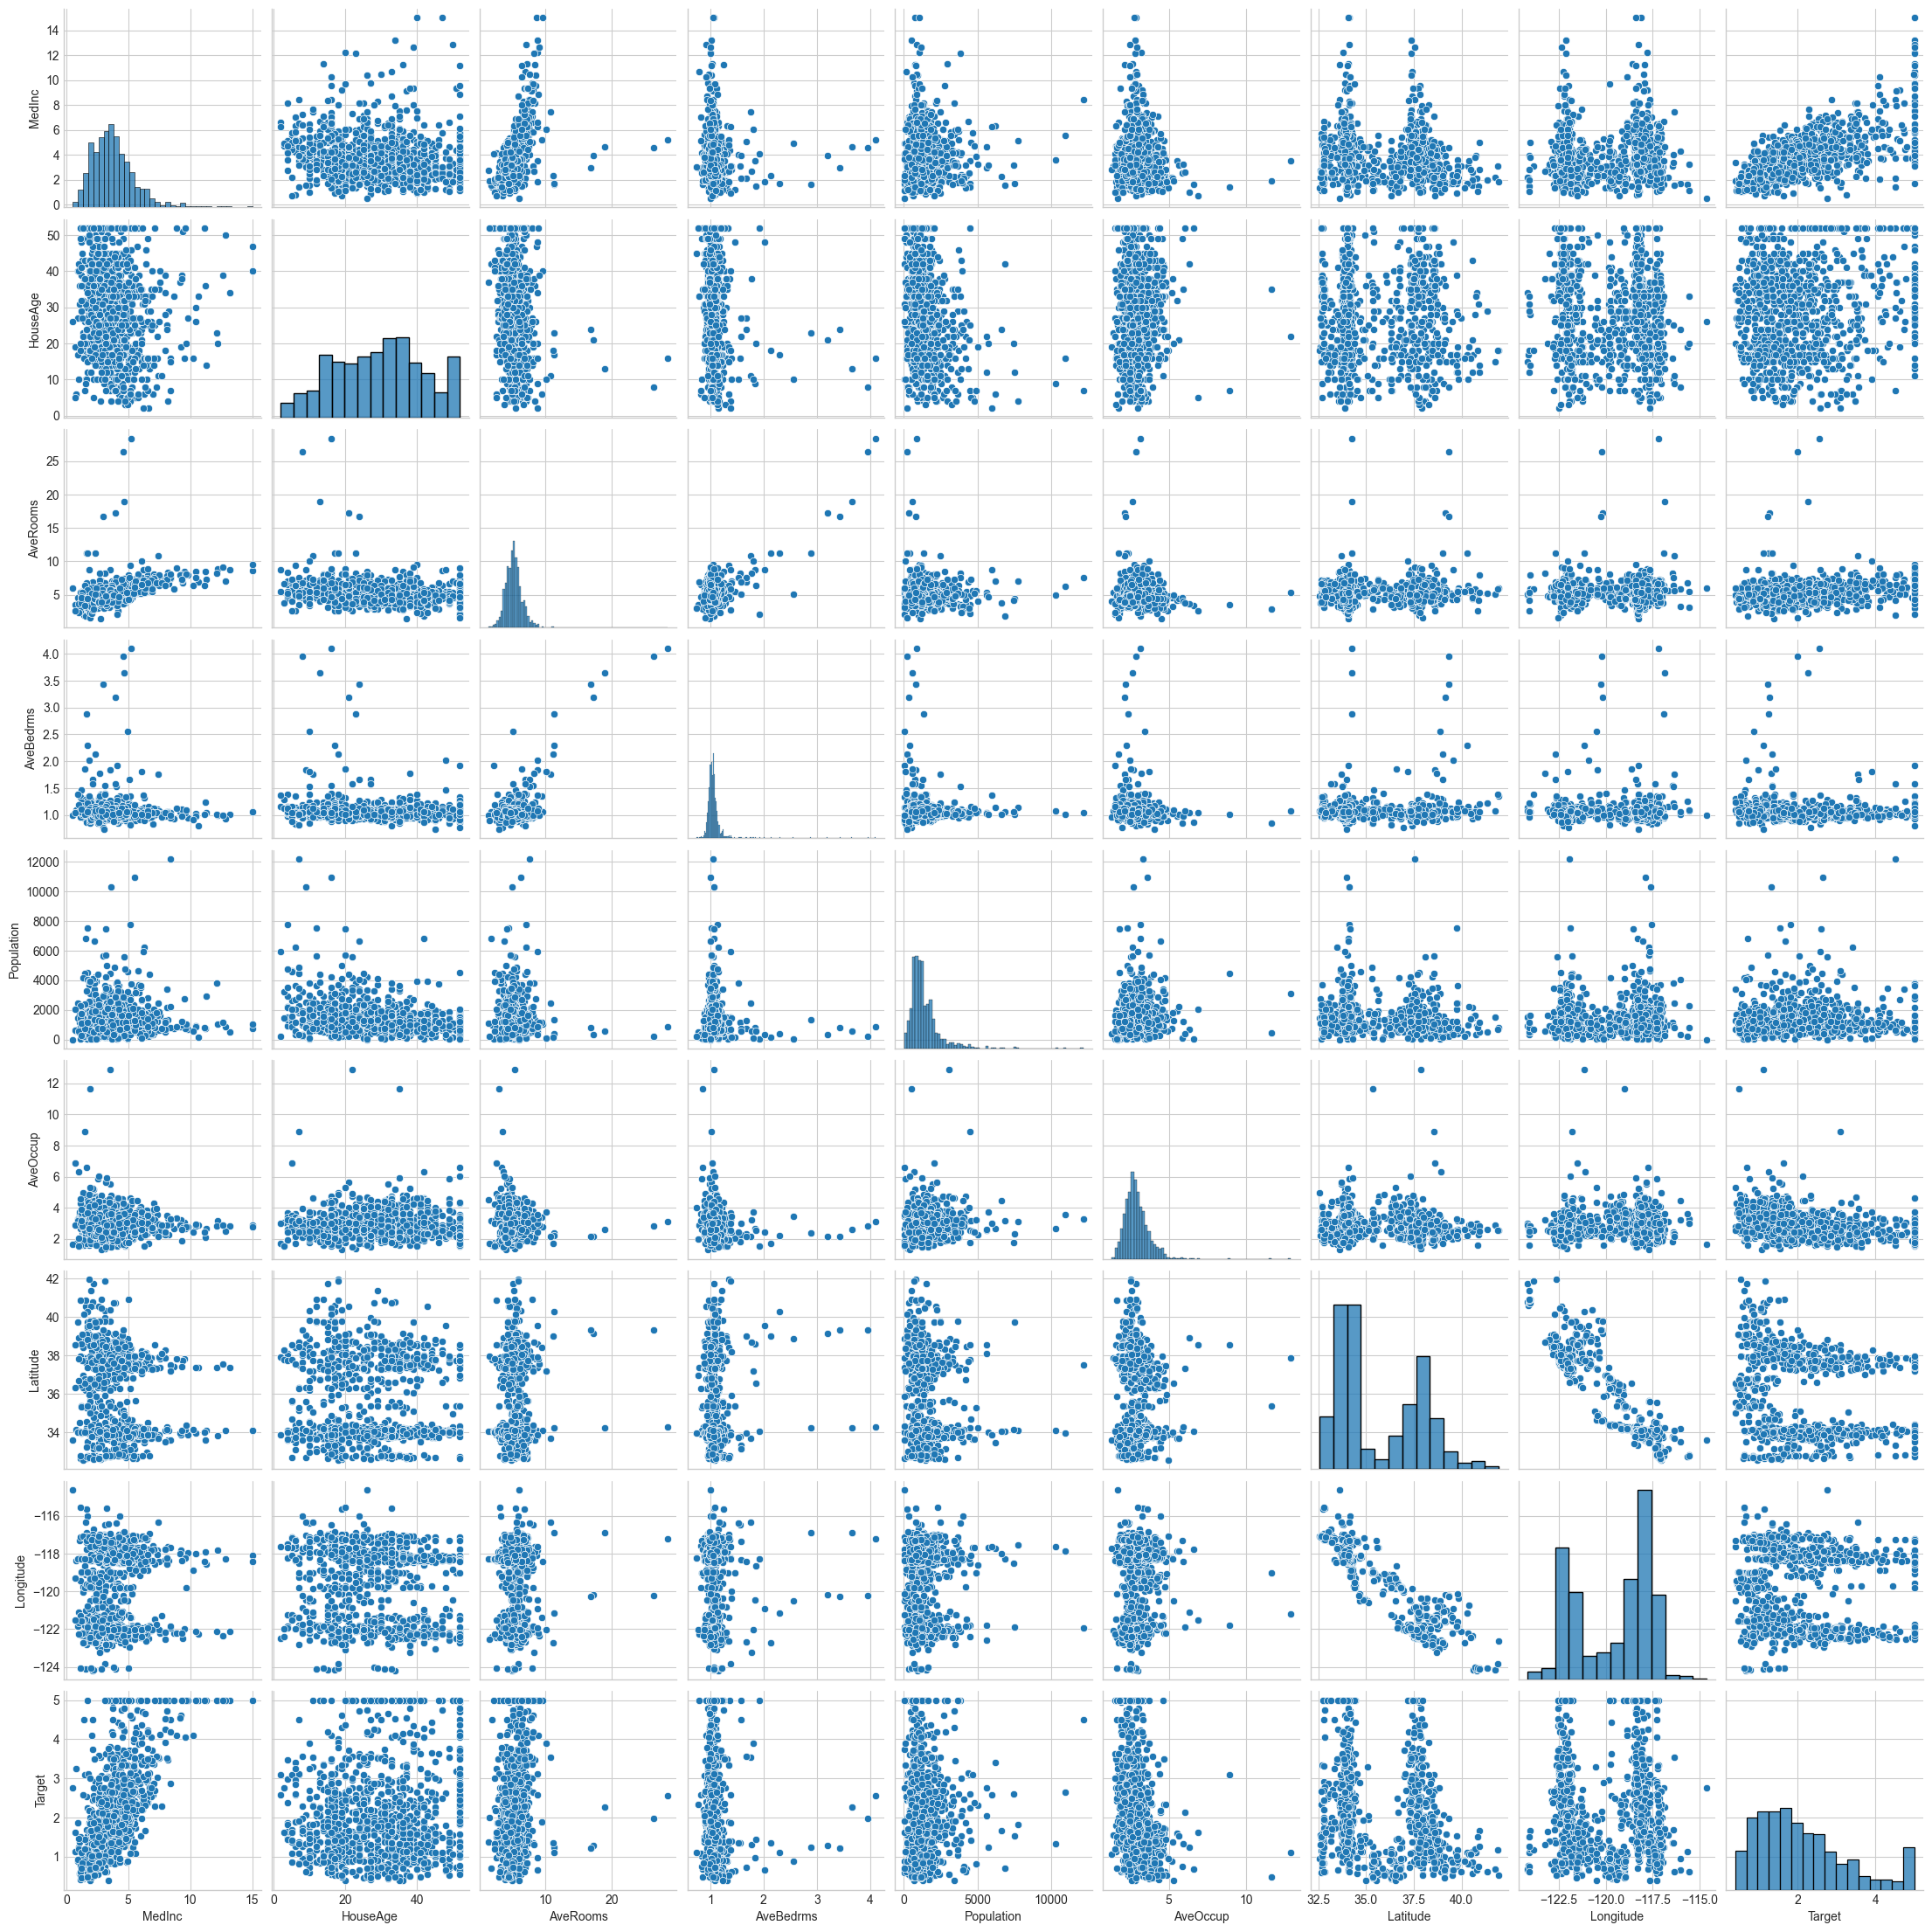

In [66]:
import seaborn as sns
sns.pairplot(california_df.sample(1000))

c:\anaconda\envs\study\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

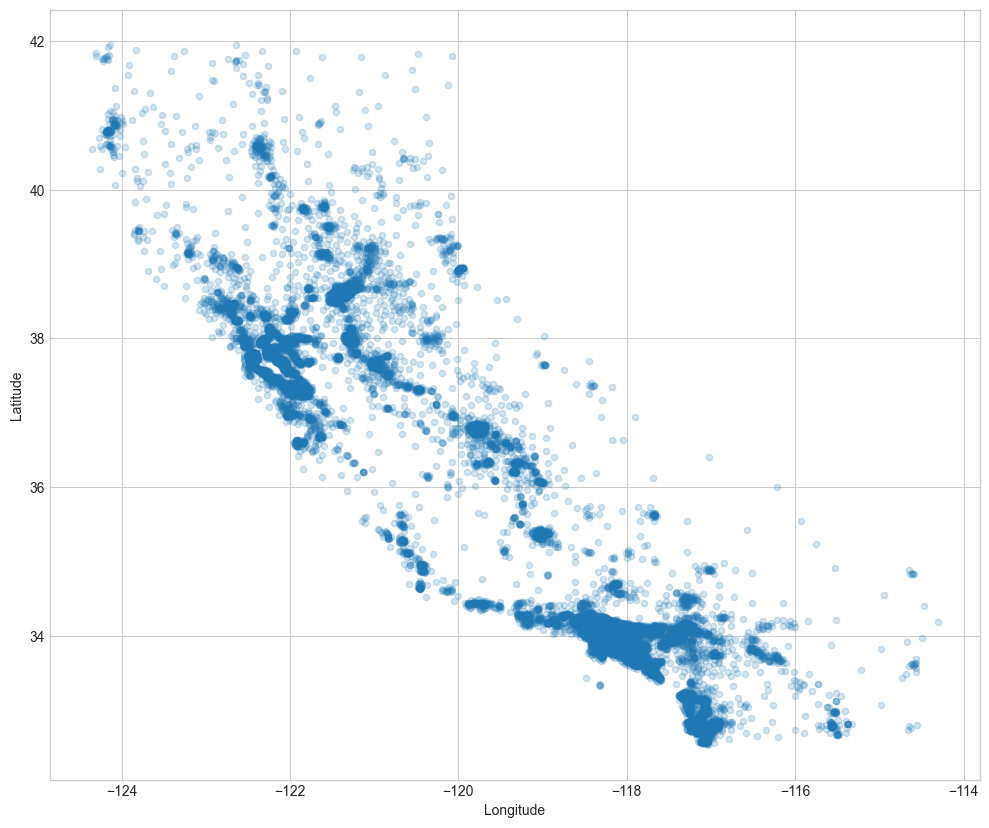

In [70]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12,10))

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

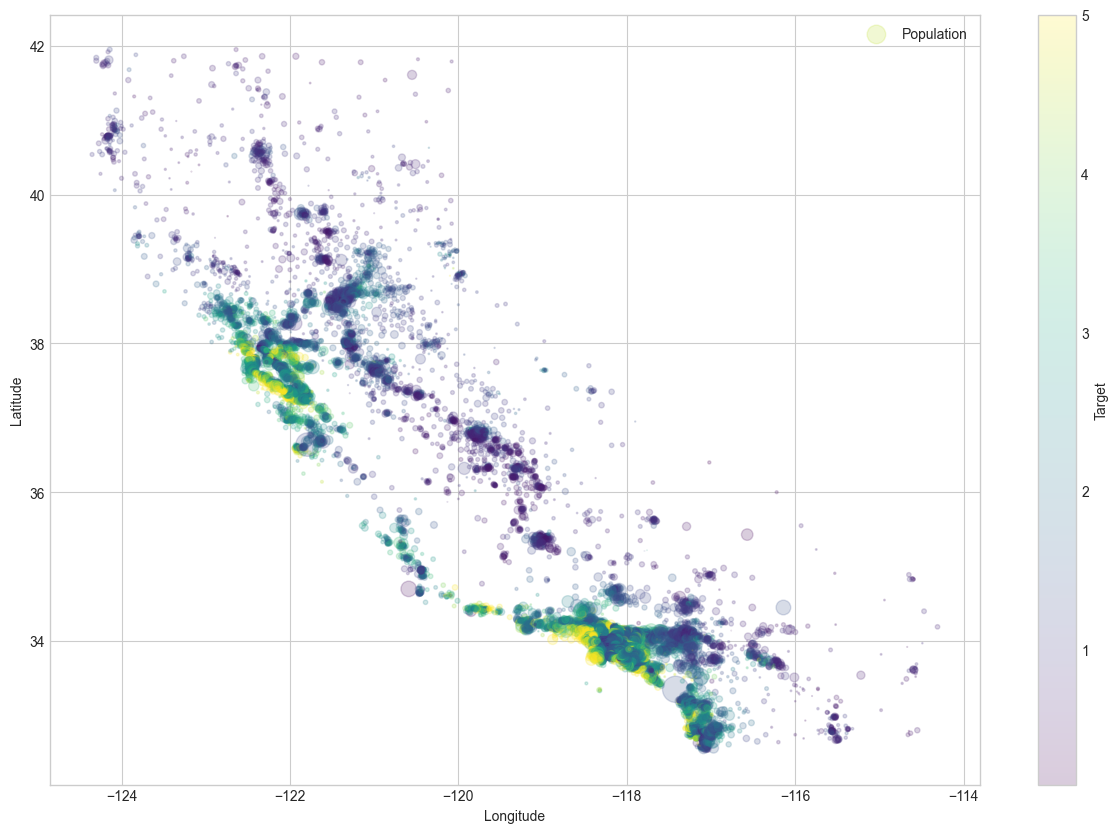

In [73]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(15,10), s=california_df['Population']/100, label='Population',c='Target', cmap=plt.get_cmap('viridis'), colorbar=True)


## 캘리포니아 주택 가격에 대한 선형 회귀

In [77]:
model = LinearRegression(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size= 0.2)

model.fit(X_train, y_train)
print('학습 데이터 점수:{}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수:{}'.format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean: {}'.format(scores.mean()))
print('NMSE std: {}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 Score:{}'.format(r2_scores.mean()))

c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

학습 데이터 점수:0.6102108005617612
평가 데이터 점수:0.5838332231625376
NMSE mean: -0.5509524296956604
NMSE std: 0.19288582953892308
R2 Score:0.5110068610524536


c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

In [79]:
print('y= ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y= -37.42589163869044 
0.44322605492441924 * x0
0.009235808323607608 * x1
-0.12128527519515833 * x2
0.7923499628378741 * x3
-3.634788639868684e-06 * x4
-0.0034793051936018024 * x5
-0.42405681004854184 * x6
-0.4385155914209501 * x7


In [80]:
y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE : 0.7199998187031156
R2 Score: 0.6102108005617612


In [81]:
y_test_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE : 0.7461857658472628
R2 Score: 0.5838332231625376


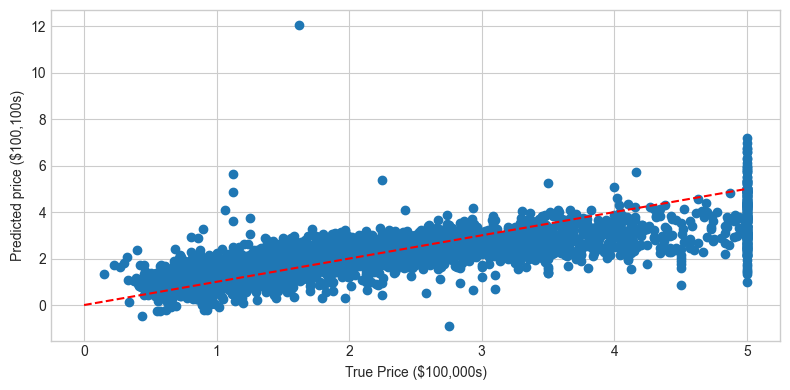

In [82]:
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([0,5],[0,5], '--r')
    plt.xlabel('True Price ($100,000s)')
    plt.ylabel('Predicted price ($100,100s)')
    plt.tight_layout()
    plt.show()

predicted = model.predict(X_test)
expected= y_test

plot_california_prices(expected, predicted)

# 릿지 회귀(Ridge Regression)

- 릿지 회귀는 선형 회귀를 개선한 선형 모델
- 릿지 회귀는 선형 회귀와 비슷, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
- 이러한 방법은 각각의 특성이 출력 값에 주는 영향을 최소한으로 만들도록 규제를 거는 것
- 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
- 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
- 릿지 회귀는 다음과 같은 함수를 최소화하는 파라미터 w를 찾음
- a: 사용자가 지정하는 매개변수
- a가 크면 규제의 효과가 커지고, a가 작으면 규제의 효과가 작아짐

### 보스턴 주택 가격에 대한 릿지 회귀

In [83]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [94]:
X, y = load_boston(return_X_y = True)  # True로 주면 기존에는 데이터를 받아오면 boston.data, boston.target 따로주나, True주면 미리 구분해서 X,y 형태로 return 시켜줌
X_train, X_test, y_train, y_test = train_test_split(X,y)

c:\anaconda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [95]:
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2)

In [96]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7288945867280925
평가 데이터 점수:0.765044143998775


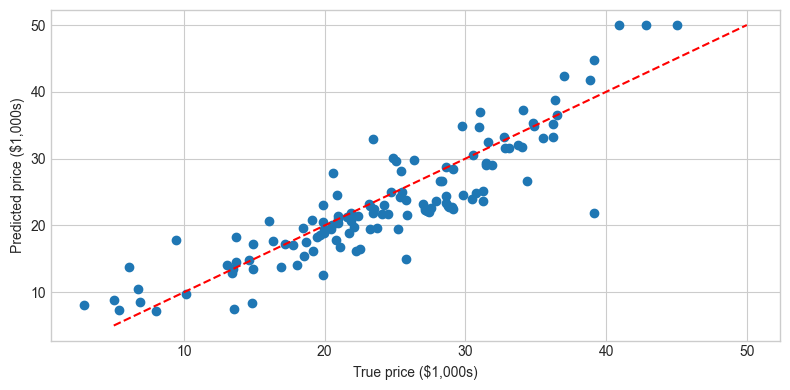

In [97]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(predicted, expected)

- 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
- 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음
- 일반화 성능에 영향을 주는 매개 변수인 a 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [115]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [116]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [117]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.6012572898833721
평가 데이터 점수:0.6255156048410152


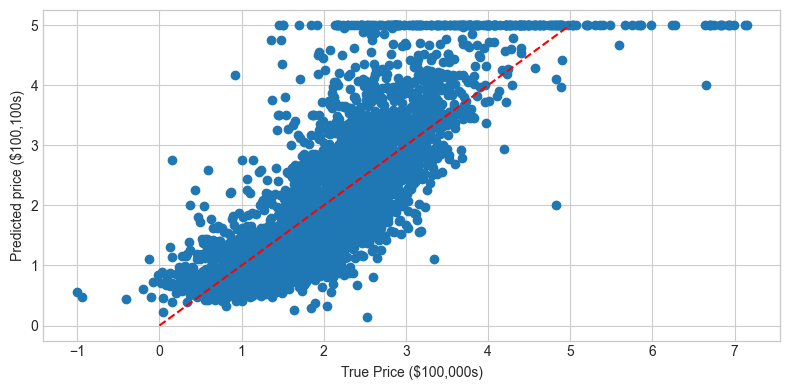

In [118]:
predicted = model.predict(X_test)
expected= y_test

plot_california_prices(predicted, expected)

### 라쏘 회귀(Lasso Regression)
- 선형 회귀에 규제를 적용한 또 다른 모델
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
- 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 w를 찾음
- 라쏘 회귀도 매개변수인 a값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [119]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [123]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

c:\anaconda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [124]:
model = Lasso(alpha = 0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [125]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7478776479096989
평가 데이터 점수:0.6982264079088629


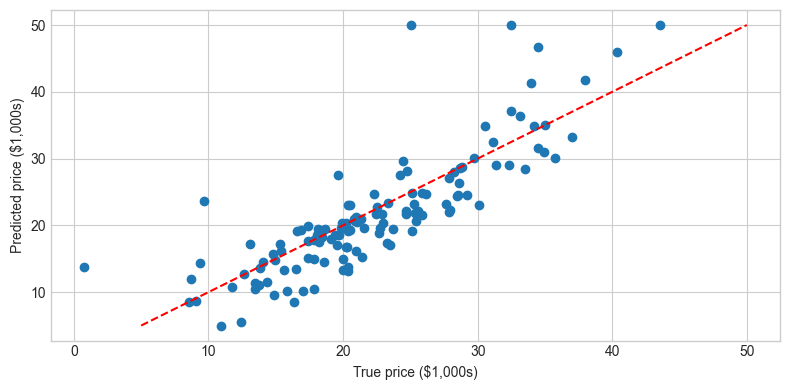

In [126]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(predicted, expected)

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [128]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [129]:
model = Lasso(0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [130]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.6052352769899287
평가 데이터 점수:0.6093874404347881


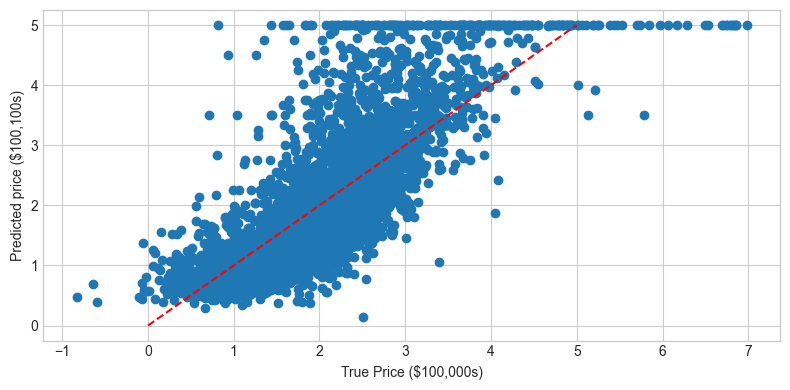

In [133]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)

## 신축망(Elastic-Net)
- 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
- 두 모델의 장점을 모두 갖음, 좋은 성능을 보임
- 데이터 특성이 많거나 서로 상관관계가 높은 특성이 존재할 때 위의 두 모델보다 좋은 성능
- 신축망은 다음과 같은 함수를 최소화하는 파라미터 w를 찾음
- a: 규제의 강도를 조절하는 매개변수
- p: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [134]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

In [135]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

c:\anaconda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [137]:
model = ElasticNet(alpha = 0.01, l1_ratio= 0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [138]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.758675405763769
평가 데이터 점수:0.6518197745565821


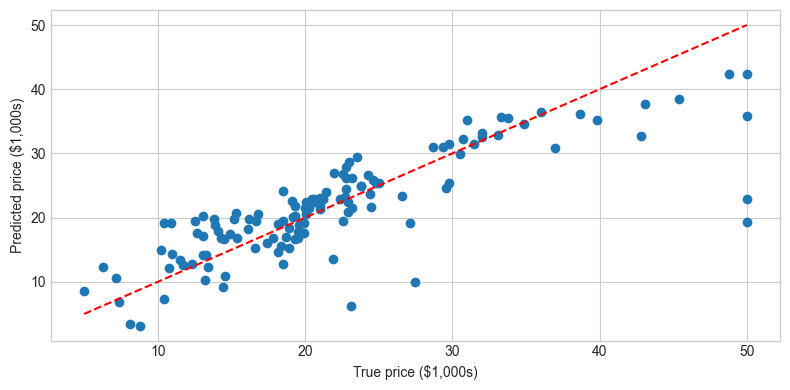

In [141]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 신축망

In [142]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size= 0.2)


In [143]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [144]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.6019277263018499
평가 데이터 점수:0.6136775022275569


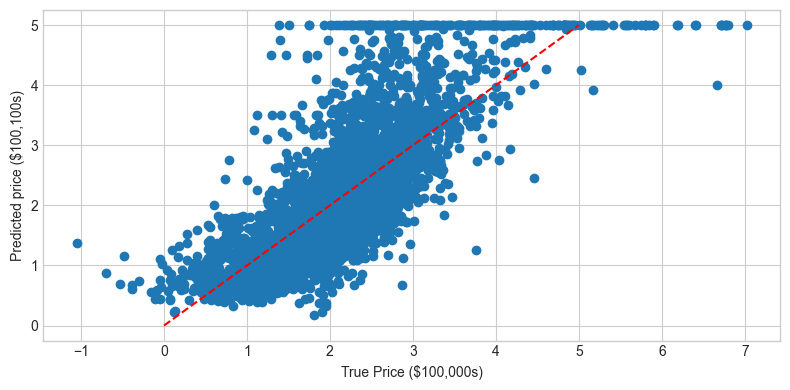

In [145]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)

## 직교 정합 추구(Orthogonal Matchin Pursuit)
- 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법
- 직교 정합 추구 방법은 다음을 만족하는 파라미터 w를 찾는 것이 목표
- ||w||0: 가중치 벡터 w에서 0이 아닌 값의 개수
- 직교 정합 추구 방법은 가중치 벡터 w에서 0이 아닌 값이 k개 이하가 되도록 훈련됨
- 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련과정에서 자동으로 제거하도록 만들 수 있음

### 보스턴 주택 가격에 대한 직교 정합 추구

In [146]:
from sklearn.datasets import load_boston
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split

In [147]:
X,y = load_boston(return_X_y = True)

X_train, X_test, y_train, y_test= train_test_split(X,y)

c:\anaconda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [148]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


OrthogonalMatchingPursuit(n_nonzero_coefs=7)

In [149]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7277321698466086
평가 데이터 점수:0.6653094473955878


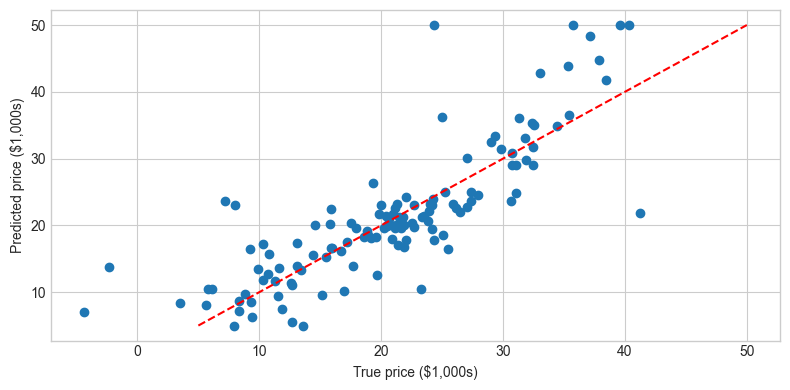

In [150]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(predicted, expected)

- 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능
- y와 y^ 사이의 오차 제곱 합을 tol 이하로 하면서 ||w||0를 최소로 하는 모델로 대체 가능

In [151]:
model = OrthogonalMatchingPursuit(tol = 1.0)
model.fit(X_train, y_train)

c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_omp.py:757: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(


OrthogonalMatchingPursuit(tol=1.0)

In [152]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7467237281239232
평가 데이터 점수:0.7161204376262781


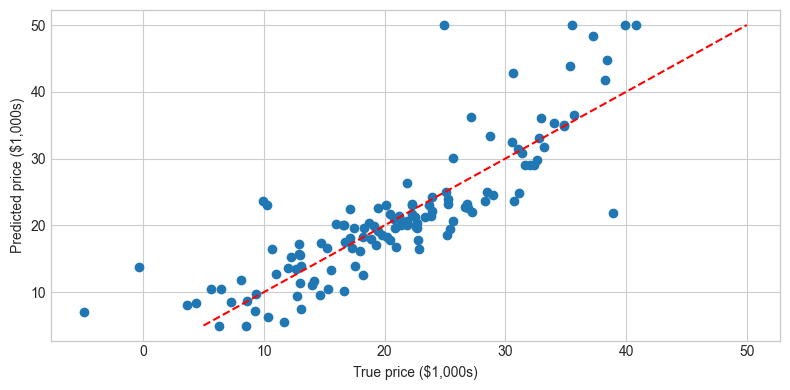

In [154]:
expected = y_test
predicted = model.predict(X_test)

plot_boston_prices(predicted, expected)

### 캘리포니아 주택 가격에 대한 직교 정합 추구

In [156]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import OrthogonalMatchingPursuit

In [159]:
california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size =0.2)

In [160]:
model =OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train, y_train)

c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [161]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.5946845885673695
평가 데이터 점수:0.6152115135499883


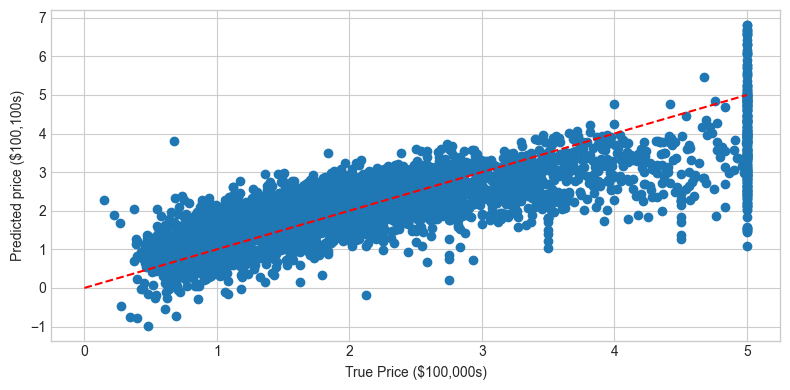

In [162]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

In [163]:
model=OrthogonalMatchingPursuit(tol=1.0)
model.fit(X_train, y_train)

c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\anaconda\envs\study\lib\site-packages\sklearn\linear_model\_omp.py:757: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(


OrthogonalMatchingPursuit(tol=1.0)

In [164]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.6019371170206791
평가 데이터 점수:0.6229949558237593


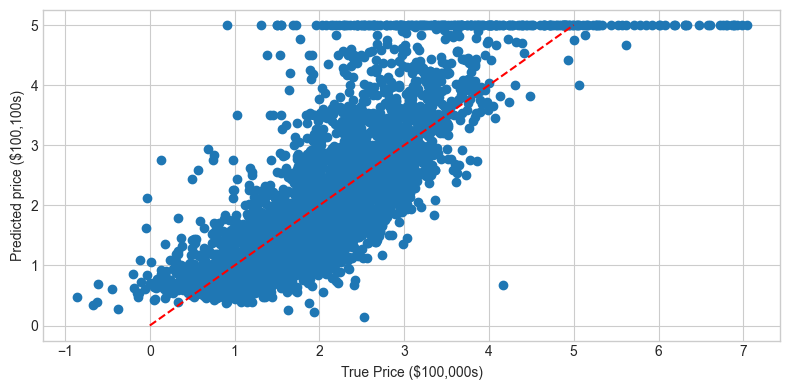

In [165]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)

## 다항 회귀(Polynomial Regression)
- 입력 데이터를 비선형 변환 후 사용하는 방법
- 모델 자체는 선형 모델
- y^ = w1x1 + w2x2 + w3x3 + w4x1^2 + w5x2^2
- 차수가 높아질수록 더 복잡한 데이터 학습 가능

### 보스턴 주택 가격에 대한 다항 회귀

In [166]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [167]:
X,y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) # random_state -> 지정하면 고정된 형태로 split을 함

c:\anaconda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [168]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [169]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.9346787783950697
평가 데이터 점수:0.8257864718002341


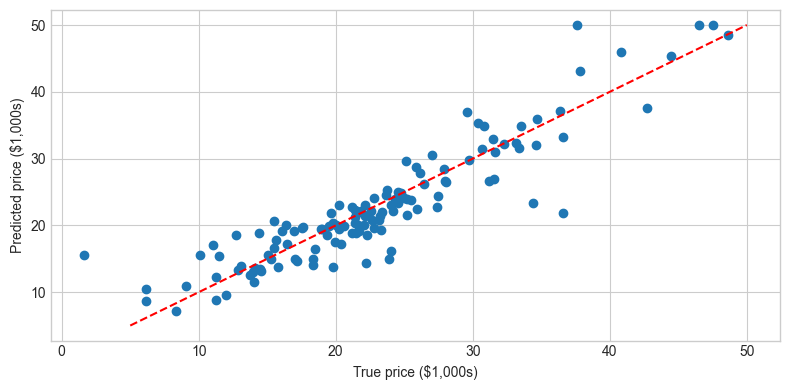

In [170]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(predicted, expected)

### 캘리포니아 주택 가격에 대한 다항 회귀

In [172]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [173]:
california = fetch_california_housing()

X_train, X_test, y_train, y_test= train_test_split(california.data, california.target, test_size=0.2)

In [175]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [176]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.6844155023771817
평가 데이터 점수:0.6582284890544923


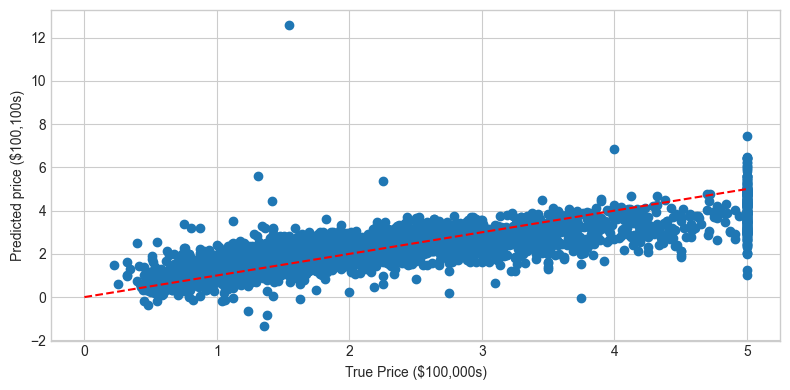

In [177]:
predicted= model.predict(X_test)
expected= y_test

plot_california_prices(expected, predicted)